# **AP157 Module C Lab Assignment**

## Module C1: Networks

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.

_Credits_: The sample social network used is taken from https://nauczanki.wordpress.com/2014/11/10/social-network-analysis-basics-in-300-words-dalmooc-assignment-week-3/, which in turn is taken from an unspecified MOOC assignment.

### Student Information

_Full Name (Last Name, First Name)_: Manliguez, Sean Arthur \
_Student No._: 2020-07582 \
_Section_: TX - 1

### Submission Information

_Date and Time Submitted (most recent upload)_: May 23, 2024 11:30 PM

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** SEAN ARTHUR C. MANLIGUEZ

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/30
* Part 2 - []/30
* Part 3 - []/30
* Part 4 - []/40

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

For all parts of this assignment,  refer to the diagram of the sample social network in the Google Drive "Datasets" Folder (https://drive.google.com/file/d/1DkAK44GfocX0bmlSfK5Q6cbYXAUkixyj/view?usp=drive_link)

## PART 1 - Network generation and characteristics *(30 points)*

1. Using the Python package networkx, define a network that represents the social network of friends in the diagram. *(15 points)*  

2. Calculate the ff. network characteristics: *(15 points; 5 points each)*
- Diameter
- Density
- Average Degree

3. Create the degree distribution plot and briefly discuss what it tells us about this social network. *(10 points)*

In [94]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np #for creating network
import networkx.drawing.nx_pylab

### **Creating the Graph**

The code below creates a network with nodes named Jill, Mike, Bob, John, Leah, Shane, Emma, Liz, Allen, and Lisa. I created the network by defining the adjacent nodes using the dictionary `adj_dict`.

In [95]:
# #Creating the nodes. The format in each line of the dictionary is node_name: (adjacent nodes)
adj_dict = {"Jill": ["Mike","Bob","John", "Leah","Shane", "Emma"],
            "Mike": ["Bob", "Emma"],
            "Bob": ["John", "Emma"],
            "John": ["Leah", "Shane"],
            "Leah": ["Shane"],
            "Shane": ["Emma", "Liz"],
            "Emma": ["Liz"],
            "Liz": ["Allen"],
            "Allen": ["Lisa"]}
H = nx.Graph(adj_dict)  #initializing the graph H by mapping nodes to their neighbors..

I then visualized the code using `nx.draw` where the nodes are separated by a "force" referred to as "Kamada Kawai" using the function `nx.kamada_kawai_layout(H)`.

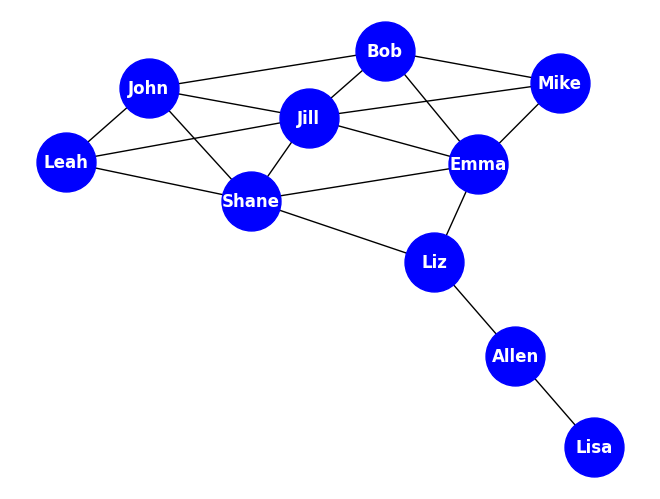

In [96]:
pos = nx.kamada_kawai_layout(H) # separation force
nx.draw(H, with_labels = True, pos = pos, font_weight = 'bold',  node_size = 1800, node_color = 'b', font_color = 'w')

##### **Network Characteristics**

In [97]:
nodes = H.nodes #initializing the nodes of the graph H to a dictionary named nodes
edges = H.edges #initializing the nodes of the graph H to a dictionary named edges

##### *Diameter*

To calculate the diameter, I used the `networkx` function `nx.shortest_path_length`, which uses the *Dijkstra* method to get the shortest path from a source node to other nodes. The code below scans through each node and uses it as the source node to get the shortest path to other nodes.

In [98]:
for node in nodes: #indexing every node in the network
  sp = list(nx.shortest_path_length(H, source = node).values()) #gets the shortest path to other nodes
  temp_diameter = np.max(sp) #gets the distance from the source to the farthest node
  if temp_diameter > diameter: #condition to check through all sourcen nodes
   diameter = temp_diameter
print(f"The diameter of the given network is {diameter}")



The diameter of the given network is 4


##### *Density*

The density is the equal to the number of edges divided by the maximum possible number of edges and is represented by the equation
$$
d = \frac{2g}{n(n-1)} \tag{1}
$$,
where $g$ is the number of edges and $n$ is the number of nodes.

In [99]:
num_nodes = len(nodes) #gets the number of nodes
num_edges = len(edges) #gets the number of edges
density = 2*num_edges/(num_nodes*(num_nodes-1)) #implementation of eq. (1)
print(f"The density of the given network is {density}")

The density of the given network is 0.4


##### *Average Degree*

The average degree is the sum of the degrees of each node divided by the total number of nodes. It is given by
$$
\mu_{degree} = \frac{1}{n}\sum_i^n D_i, \tag{2}
$$
where $D$ is the degree of the node $i$. The degree of the node refers to its number of edges.

In [100]:
sum_degree = 0
#adjs = H.adj #takes the
node_degree_list = []
for node in nodes:
  node_degree = len(H.adj[node]) #takes the number of adjacent nodes
  node_degree_list.append(node_degree) #appends it to the list of the degrees
  sum_degree += node_degree #takes the summation
average_degree = sum_degree/num_nodes #taking the average
print(f"The average degree of the given network is {average_degree}")

The average degree of the given network is 3.6


##### *Degree Distribution Plot*

The degree distribution plot tells us the fraction of nodes that have a particular degree.

In [101]:
degree_values = np.unique(node_degree_list) #takes the possible degrees
frac_nodes = [] #fraction of nodes with a particular degree
for value in degree_values:
  count = node_degree_list.count(value) #counts the number of nodes with a degree of value
  frac_nodes.append(count/num_nodes) #adds it to the list

Based on the distribution below, we see that a large fraction of the nodes have a degree of 3. Greater than half of the nodes have a degree of 3-5, this suggests that the network is moderately connected.

Text(0, 0.5, 'Fraction of Nodes')

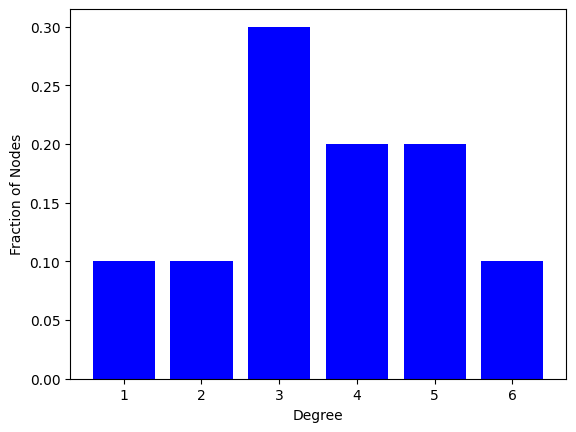

In [102]:
#visualizing the degree distribution plot in a bar graph
plt.bar(degree_values,frac_nodes, color = 'b')
plt.xlabel("Degree")
plt.ylabel("Fraction of Nodes")

## PART 2 - Centrality Measures *(30 points)*

Generate a table of centrality measures per node. Columns are:
- Name
- Degree Centrality
- Betweenness Centrality
- Closeness Centrality

Briefly discuss who are the most "central" people in the social network and why.

In [103]:
import pandas as pd

##### *Degree Centrality*

To calculate the Degree Centrality, I first created an adjacency matrix using `pandas`. The row and column titles refer to the nodes. The elements of the adjacency matrix tells which nodes are adjacent. This is usually indicated by a 1 in the element of the matrix. Evidently, the diagonal is 0 since a matrix cannot be adjacent to itself. At a glance, we see that Jill has the most adjacent matrix. Since the network is undirected, the adjacency matrix is symmetrical along the diagonal. The adjacency matrix was created using the `networkx` package with the function `nx.adjacency_matrix(H)`, where H is the network.

In [104]:
A = nx.adjacency_matrix(H).A #creates the adjacency matrix
nodes_array = np.array(nodes) #converts the nodes dictionary into an array for easier handling
adjacency_matrix = pd.DataFrame(A, columns = nodes, index = nodes) #initializing the adjacency matrix as a dataframe

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_base.py:719: VisibleDeprecationWarning: `.A` is deprecated and will be removed in v1.13.0. Use `.toarray()` instead.
  warn(np.VisibleDeprecationWarning(


In [105]:
display(adjacency_matrix) #visualization

,Jill,Mike,Bob,John,Leah,Shane,Emma,Liz,Allen,Lisa
Jill,0,1,1,1,1,1,1,0,0,0
Mike,1,0,1,0,0,0,1,0,0,0
Bob,1,1,0,1,0,0,1,0,0,0
John,1,0,1,0,1,1,0,0,0,0
Leah,1,0,0,1,0,1,0,0,0,0
Shane,1,0,0,1,1,0,1,1,0,0
Emma,1,1,1,0,0,1,0,1,0,0
Liz,0,0,0,0,0,1,1,0,1,0
Allen,0,0,0,0,0,0,0,1,0,1
Lisa,0,0,0,0,0,0,0,0,1,0


In [106]:
degree_centrality = adjacency_matrix.sum(axis=1)/(num_nodes-1)
print(degree_centrality)

Jill     0.666667
Mike     0.333333
Bob      0.444444
John     0.444444
Leah     0.333333
Shane    0.555556
Emma     0.555556
Liz      0.333333
Allen    0.222222
Lisa     0.111111
dtype: float64


##### Closeness Centrality

The closeness centrality quantifies which nodes are the farthest from other nodes. The greater the number the closer the node is to others. In this case, the distance is quantified by the number of edges or steps needed to traverse from the source to other nodes. It is given by the equation
$$
C(u) = \frac{n-1}{\sum_{v=1}^{n-1}d(v,u)},
$$
where d(v, u) is the shortest-path distance between v and u, and n-1 is the number of nodes reachable from u

In [107]:
Distance = [] #array to store the distances of a source node to other nodes
for node in nodes:
  dist = nx.shortest_path_length(H, source = node) #gets the distances of one source node to other node
  Distance.append(dist) #appends the dist to create a matrix

In [108]:
closeness = pd.DataFrame(Distance, columns = nodes, index = nodes) #converts the matrix to a dataframe for visualization

At a glance, we see that Lisa has the largest distance from the other nodes. Its distance to Jill, Mike, Bob, John, Leah is equal to 4, which is the diameter of the network.

In [109]:
display(closeness) #visualization

,Jill,Mike,Bob,John,Leah,Shane,Emma,Liz,Allen,Lisa
Jill,0,1,1,1,1,1,1,2,3,4
Mike,1,0,1,2,2,2,1,2,3,4
Bob,1,1,0,1,2,2,1,2,3,4
John,1,2,1,0,1,1,2,2,3,4
Leah,1,2,2,1,0,1,2,2,3,4
Shane,1,2,2,1,1,0,1,1,2,3
Emma,1,1,1,2,2,1,0,1,2,3
Liz,2,2,2,2,2,1,1,0,1,2
Allen,3,3,3,3,3,2,2,1,0,1
Lisa,4,4,4,4,4,3,3,2,1,0


In [110]:
closeness_centrality = (num_nodes-1)/closeness.sum(axis=1)
print(closeness_centrality)

Jill     0.600000
Mike     0.500000
Bob      0.529412
John     0.529412
Leah     0.500000
Shane    0.642857
Emma     0.642857
Liz      0.600000
Allen    0.428571
Lisa     0.310345
dtype: float64


##### Betweenness Centrality

Conceptually, the betweenness centrality of a node $i$ is the probability that a shortest simple path from nodes $u$ and $v$ ($u\to v$) passes through node $i$. It is given by the equation
$$
C_B(i) = \sum_{u,v\in V}\frac{\sigma(u,v|i)}{\sigma(u,v)}
$$
and normalized to

$$
C_B(i) = \sum_{u,v\in V}\frac{\sigma(u,v|i)}{\sigma(u,v)}×\frac{2}{(n-1)(n-2)}
$$.
for undirected networks. $V$ is the set of nodes. The variable `intermediate` refers to node $i$, while the variables `source` and `target` refers to $u$ and $v$ respectively.

In [111]:
betweenness = [] #array to store the betweenness of each node
#the commented out part of the for loop is used for debugging, it may commented it to follow the steps.
#the variables is reffered as follows
for intermediate in nodes_array:
  # print(f"Intermediate: {intermediate}")
  # print(f"----------------------------")
  sigma = 0 #ratio of paths with i over the total number of paths
  betweenness_i = 0
  for source in nodes_array: #scans through all of the nodes with the exception of the intermediate
    if source != intermediate: #to make sure that the intermediate does not act as the source
      for target in nodes_array: #scans through all of the nodes with the exception of the intermediate
        if target != intermediate:# #to make sure that the intermediate does not act as the target
          ipaths = 0 #initializing the paths which passes through the intermediate
          paths = 0 #initializing the total number of paths
          all_paths = nx.all_shortest_paths(H, source = source, target = target) #gets all the shortest paths from the source to the target
          # print("======================================")
          # print(f"Source: {source} Target: {target}")
          for path in all_paths:
            paths +=1 #in order to count the number of paths
            if intermediate in path:
              ipaths += 1 #in order to count the number of ipaths
          # print("....................................")
          # print(f"Source to Target Total Paths: {paths}")
          # print(f"{ipaths} Path Between {source} and {target} containing {intermediate}")
          sigma = ipaths/paths #ratio of paths (the term inside the summation)
          betweenness_i+=sigma/2 #summation divided by 2 to compensate for the double counting
      #     print(f"Sigma ======== {sigma}")
      # print(f"Sigma ======== {sigma}")
  betweenness.append(betweenness_i)

#unnormalized betweenness
  print(f"The betweeness of {intermediate} is {betweenness_i}")
betweenness = np.array(betweenness)
display(betweenness)

The betweeness of Jill is 3.6666666666666665
The betweeness of Mike is 0.0
The betweeness of Bob is 0.8333333333333333
The betweeness of John is 0.8333333333333333
The betweeness of Leah is 0.0
The betweeness of Shane is 8.333333333333332
The betweeness of Emma is 8.333333333333332
The betweeness of Liz is 14.0
The betweeness of Allen is 8.0
The betweeness of Lisa is 0.0


array([ 3.66666667,  0.        ,  0.83333333,  0.83333333,  0.        ,
        8.33333333,  8.33333333, 14.        ,  8.        ,  0.        ])

In [112]:
normalized_betweenness = betweenness*(2/((num_nodes-1)*(num_nodes-2)))#normalization of the betweenness centrality as given by eq
print(f"Normalized betweeness:\n {normalized_betweenness}")

Normalized betweeness:
 [0.10185185 0.         0.02314815 0.02314815 0.         0.23148148
 0.23148148 0.38888889 0.22222222 0.        ]


#####Table of Centrality Values

Visualization of the centrality values in a table. From here, we clearly see that Jill is the most "central" node, Shane and Emma is the closest to everyone, and Mike, Leah, and Lisa is "not between" two nodes.

In [113]:
betweenness_centrality = normalized_betweenness
centrality = pd.DataFrame({
    "Node": nodes_array,
    "Degree Centrality": degree_centrality,
    "Closeness Centrality": closeness_centrality,
    "Betweenness Centrality": betweenness_centrality,
})
display(centrality)

,Node,Degree Centrality,Closeness Centrality,Betweenness Centrality
Jill,Jill,0.666667,0.600000,0.101852
Mike,Mike,0.333333,0.500000,0.000000
Bob,Bob,0.444444,0.529412,0.023148
John,John,0.444444,0.529412,0.023148
Leah,Leah,0.333333,0.500000,0.000000
Shane,Shane,0.555556,0.642857,0.231481
Emma,Emma,0.555556,0.642857,0.231481
Liz,Liz,0.333333,0.600000,0.388889
Allen,Allen,0.222222,0.428571,0.222222
Lisa,Lisa,0.111111,0.310345,0.000000


## PART 3 - Identify communities *(40 points)*

1. Identify communities in the social network using *(30 points)*:
- Louvain community detection algorithm
- Any other community detection algorithm of your choice

2. Calculate the modularity of the partitions from the two community detection algorithms. *(10 points)*

Briefly describe the algorithm you used and compare the results from the two algorithms.

In [114]:
from community import community_louvain as community_louvain
import matplotlib.cm as cm

To detect the communities, I used Louvain and Girvan-Newman community detection algorithm.

In principle, the **Louvain Community Detection** algorithm is a method based on modularity optimization. It first assigns every node to be a community consisting of itself. Then it moves each node into the neighboring communities, with the aim of getting the maximum possible increase in modularity. If there is no modularity increase, the system remains as is [3].

The **Girvan-Newman** algorithm on the other hand detects communities by progressively removing "important edges". The removed edge at each step usually has the highest betweenness centrality. The community is then exposed as the graph breaks down.

In [164]:
louvain_communities = nx.community.louvain_communities(H, resolution=1)
girvan_communities = nx.community.girvan_newman(H)


The code below uses the `nx.community.modularity` function of `networkx` to calculate the modularity of the graph after Louvain and Girvan-Newman community detection. The modularity is given by the equation
$$
Q = \sum_{c = 1}^n \left[\frac{L_c}{m}-\gamma\left(\frac{k_c}{2g}\right)^2\right],
$$
where $c$ pertains to the community, $n$ is the number of communities, $g$ is the number of edges, $L_c$ is the number of links in the community $c$, $k_c$ is the sum of degrees of the nodes, and $\gamma$ is the resolution parameter [4].
For the Girvan-Newman Community detection, the modularity of the network is computed by summing the the modularity of each community identified.

In [165]:
l_mod = nx.community.modularity(H, louvain_communities) #modularity of the Louvain Communities
g_mod = 0 #modularity of the Girvan-Newman Communities
no_communities = 0
for communities in girvan_communities: #getting the modularity for each community
    modularity = nx.community.modularity(H, communities) #calculating the modularity of the community
    g_mod+=modularity #modularity of the network
print(f"The modularity of the Louvain Method is {l_mod}\n",
      f"The modularity of the Girvan-Newman Method is {g_mod}")

The modularity of the Louvain Method is 0.2222222222222222
 The modularity of the Girvan-Newman Method is 0.40432098765432095


The following code for visualization was taken from [2]. From the image below, we see that the Louvain Community Detection Algorithm identified 3 communities. The purple community involves {Lisa, Allen, Liza} the green community involves {Shane, Leah, John, Jill}, and the yellow community involves {Emma, Bob, Mike}. In the case of the Girvan-Newman algorithm, it detected 2 communities. The green community involves {Lisa, Allen}, while the rest is in the red community.

<ipython-input-157-48b4b16d0c3a>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', max(louvain_partition.values()) + 1)


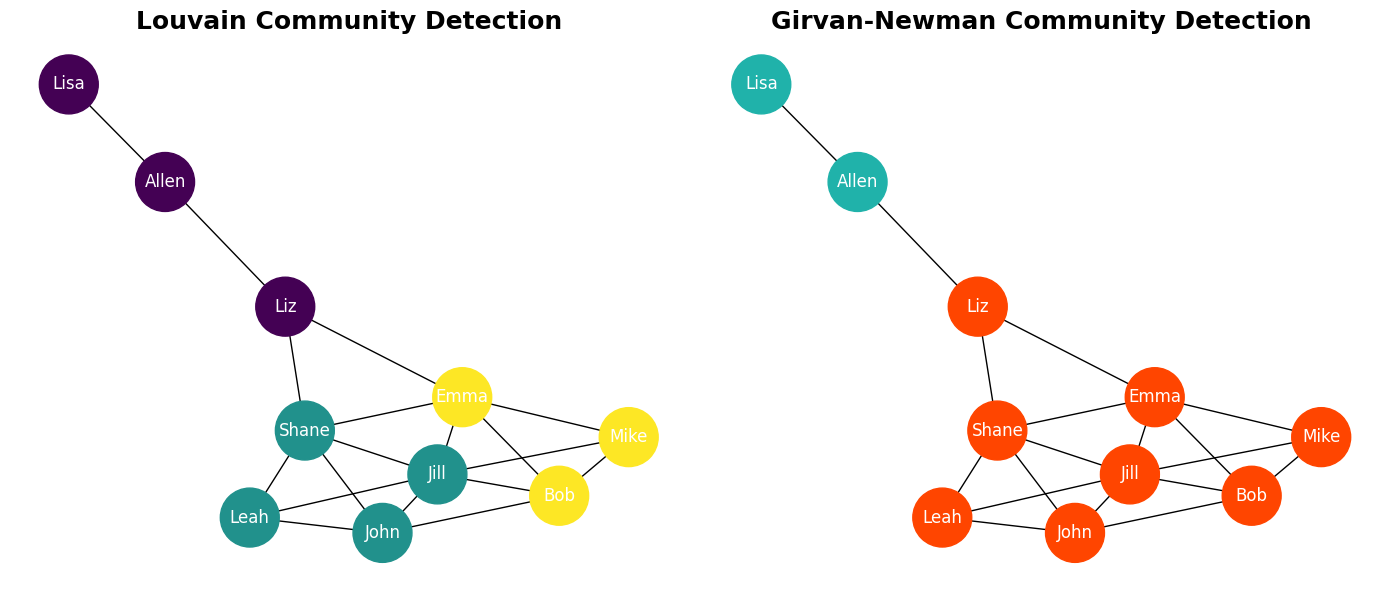

In [157]:
#Layout for visualization
pos = nx.spring_layout(H)
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

#Louvain community detection
louvain_partition = community_louvain.best_partition(H)
cmap = cm.get_cmap('viridis', max(louvain_partition.values()) + 1)
axs[0].set_title("Louvain Community Detection", fontweight='bold', fontsize=18)
nx.draw(H, pos=pos, ax=axs[0], font_color = 'w',node_size=1800, with_labels=True, node_color=[cmap(color) for node, color in louvain_partition.items()])

#Girvan-Newman community detection
girvan_newman_communities = nx.community.girvan_newman(H)
node_groups = list(next(girvan_newman_communities))
axs[1].set_title("Girvan-Newman Community Detection", fontweight='bold', fontsize=18)
nx.draw(H, pos=pos, ax=axs[1], font_color = 'w',node_size=1800, with_labels=True, node_color=['orangered' if node in node_groups[0] else 'lightseagreen' for node in H.nodes()])

plt.tight_layout()
plt.show()

#### References:
[1] https://networkx.org/documentation/stable/index.html

[2] https://memgraph.com/blog/community-detection-algorithms-with-python-networkx

[3] https://networkx.org/documentation/stable/reference/algorithms/generated/
networkx.algorithms.community.louvain.louvain_communities.html

[4] https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.quality.modularity.html